In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
import logging
import requests
from bs4 import BeautifulSoup
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from spacy import displacy
import spacy
from sklearn.metrics import classification_report 
import pickle
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wikipedia as w
import string
import random
import re
import nltk
from nltk.probability import FreqDist
from textblob import TextBlob
from sklearn.datasets import load_files
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, accuracy_score
from nltk.stem import WordNetLemmatizer

import seaborn as sns
from math import sqrt
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
%matplotlib inline

nlp= spacy.load("en_core_web_sm")

In [2]:
def url_script(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page,'lxml')
    text = [ p.text for p in soup.find(class_ = 'elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content').find_all('p') ]
    print(url)
    return text

In [3]:
data_text= url_script('https://scrapsfromtheloft.com/2020/08/23/umberto-eco-narrative-structure-ian-fleming/')

https://scrapsfromtheloft.com/2020/08/23/umberto-eco-narrative-structure-ian-fleming/


In [4]:
print(data_text[3])

To Spillane, Casino Royale owes, beyond doubt, at least two characteristic elements. First of all the girl Vesper Lynd, who arouses the confident love of Bond, in the end is revealed as an enemy agent. In a novel by Spillane the hero would have killed her, while in Fleming the woman had the grace to commit suicide; but Bond’s reaction when it happens has the Spillane characteristic of transforming love into hatred and tenderness to ferocity: “She’s dead, the bitch” Bond telephones to his London office, and so ends his romance.


## Raw Data & Saving

In [5]:
df_scrap= pd.DataFrame()

In [6]:
df_scrap['raw-data']= np.array(data_text)

In [7]:
df_scrap.head()

,raw-data
0,"In the following excerpt, originally published..."
1,by Umberto Eco
2,In 1953 Ian Fleming published the first novel ...
3,"To Spillane, Casino Royale owes, beyond doubt,..."
4,In the second place Bond is obsessed by an ima...


In [8]:
df_scrap.to_csv("scrap_raw_data.csv", index=True)

## Preprocessing

In [9]:
len(data_text)

124

In [10]:
#string.punctuation

In [11]:
#stopwords.words("english")

In [12]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(data_text)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str( data_text[sen]))
    
    # remove all punctuations
    document = re.sub(re.escape(string.punctuation), '', document)
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    document = [ word for word in document.split() if word not in stopwords.words("english")]
    document = ' '.join(document)
    
    documents.append(document)

In [13]:
documents[0]

'following excerpt originally published italian 1965 eco offer detailed examination narrative formula fleming employed bond novel strategy eco regard basis success 007 saga'

In [14]:
df = pd.DataFrame()
df['original']= data_text
df["Document"]= documents

In [15]:
df.to_csv("scrap.csv", index=False)

In [16]:
df= pd.read_csv('scrap.csv')

In [17]:
df.head()

,original,Document
0,"In the following excerpt, originally published...",following excerpt originally published italian...
1,by Umberto Eco,umberto eco
2,In 1953 Ian Fleming published the first novel ...,1953 ian fleming published first novel 007 ser...
3,"To Spillane, Casino Royale owes, beyond doubt,...",spillane casino royale owes beyond doubt least...
4,In the second place Bond is obsessed by an ima...,second place bond obsessed image japanese expe...


In [18]:
TextBlob(df["Document"].iloc[0]).sentiment

Sentiment(polarity=0.215, subjectivity=0.32)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7,ngram_range=(1,3) ,stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(df["Document"]).toarray()

In [20]:
tfidfconverter.get_feature_names()

['007',
 'absolutely',
 'act',
 'action',
 'almost',
 'already',
 'also',
 'always',
 'ambiguous',
 'among',
 'anglo',
 'anglo saxon',
 'another',
 'appearance',
 'appears',
 'author',
 'beginning',
 'big',
 'black',
 'blofeld',
 'blood',
 'body',
 'bond',
 'book',
 'call',
 'case',
 'casino',
 'casino royale',
 'century',
 'certain',
 'chance',
 'character',
 'characteristic',
 'chiffre',
 'choice',
 'cold',
 'communist',
 'conflict',
 'could',
 'country',
 'couple',
 'course',
 'cruel',
 'de',
 'death',
 'describe',
 'description',
 'detail',
 'diamond',
 'different',
 'doe',
 'dominated',
 'dr',
 'drax',
 'ear',
 'either',
 'element',
 'elementary',
 'end',
 'enemy',
 'english',
 'erotic',
 'escape',
 'even',
 'every',
 'evil',
 'example',
 'except',
 'excess',
 'eye',
 'eyelash',
 'face',
 'fact',
 'figure',
 'final',
 'first',
 'five',
 'fleming',
 'following',
 'forever',
 'form',
 'four',
 'free',
 'free world',
 'function',
 'game',
 'general',
 'german',
 'girl',
 'give',
 'go

In [21]:
len(tfidfconverter.get_feature_names())

266

In [22]:
df['Document'][:]

0      following excerpt originally published italian...
1                                            umberto eco
2      1953 ian fleming published first novel 007 ser...
3      spillane casino royale owes beyond doubt least...
4      second place bond obsessed image japanese expe...
                             ...                        
119    hand woman fleming cannot accept decadent arch...
120    however concerned psychological interpretation...
121    message doe really end except concrete local r...
122    source eco umberto narrative structure fleming...
123             twentieth century literary criticism 193
Name: Document, Length: 124, dtype: object

In [23]:
fdist = FreqDist()

In [24]:
for x in str(df['Document'][:]).split():
    fdist[x]+=1
    
len(fdist)
    

72

In [78]:
fdist.most_common(50)

[('published', 2),
 ('umberto', 2),
 ('eco', 2),
 ('fleming', 2),
 ('0', 1),
 ('following', 1),
 ('excerpt', 1),
 ('originally', 1),
 ('italian...', 1),
 ('1', 1),
 ('2', 1),
 ('1953', 1),
 ('ian', 1),
 ('first', 1),
 ('novel', 1),
 ('007', 1),
 ('ser...', 1),
 ('3', 1),
 ('spillane', 1),
 ('casino', 1),
 ('royale', 1),
 ('owes', 1),
 ('beyond', 1),
 ('doubt', 1),
 ('least...', 1),
 ('4', 1),
 ('second', 1),
 ('place', 1),
 ('bond', 1),
 ('obsessed', 1),
 ('image', 1),
 ('japanese', 1),
 ('expe...', 1),
 ('...', 1),
 ('119', 1),
 ('hand', 1),
 ('woman', 1),
 ('cannot', 1),
 ('accept', 1),
 ('decadent', 1),
 ('arch...', 1),
 ('120', 1),
 ('however', 1),
 ('concerned', 1),
 ('psychological', 1),
 ('interpretation...', 1),
 ('121', 1),
 ('message', 1),
 ('doe', 1),
 ('really', 1)]

In [79]:
ser= pd.Series(tfidfconverter.get_feature_names())
ser.count()

266

In [80]:
df['polarity']= df["Document"].apply(lambda x : TextBlob(x).sentiment[0])
df['Subjectivity']= df["Document"].apply(lambda x : TextBlob(x).sentiment[1])

In [81]:
df.head()

,original,Document,polarity,Subjectivity
0,"In the following excerpt, originally published...",following excerpt originally published italian...,0.215000,0.320000
1,by Umberto Eco,umberto eco,0.000000,0.000000
2,In 1953 Ian Fleming published the first novel ...,1953 ian fleming published first novel 007 ser...,-0.103704,0.483333
3,"To Spillane, Casino Royale owes, beyond doubt,...",spillane casino royale owes beyond doubt least...,0.101852,0.455556
4,In the second place Bond is obsessed by an ima...,second place bond obsessed image japanese expe...,-0.040132,0.318933


In [82]:
df['Lenght']= df["Document"].apply(lambda x: len(x.split()))

In [83]:
df.head()

,original,Document,polarity,Subjectivity,Lenght
0,"In the following excerpt, originally published...",following excerpt originally published italian...,0.215000,0.320000,23
1,by Umberto Eco,umberto eco,0.000000,0.000000,2
2,In 1953 Ian Fleming published the first novel ...,1953 ian fleming published first novel 007 ser...,-0.103704,0.483333,30
3,"To Spillane, Casino Royale owes, beyond doubt,...",spillane casino royale owes beyond doubt least...,0.101852,0.455556,51
4,In the second place Bond is obsessed by an ima...,second place bond obsessed image japanese expe...,-0.040132,0.318933,99


In [84]:
df.to_csv('scrapdata_sentiment.csv', index=False)

In [85]:
doc= nlp(df["Document"].iloc[0])
displacy.render(doc)

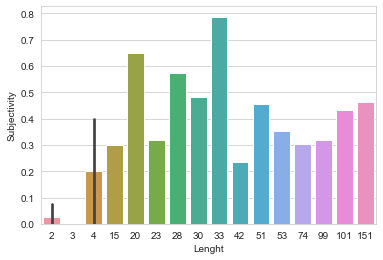

In [86]:
sns.barplot(df['Lenght'][:20], df['Subjectivity'][:20] )

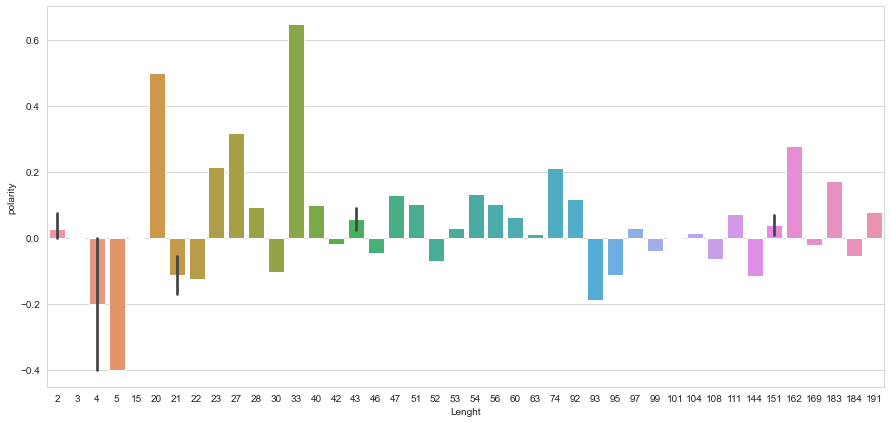

In [87]:
plt.figure(figsize=(15,7))
sns.barplot(df['Lenght'][:50], df['polarity'][:50] )

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2]),
 <a list of 9 Text major ticklabel objects>)

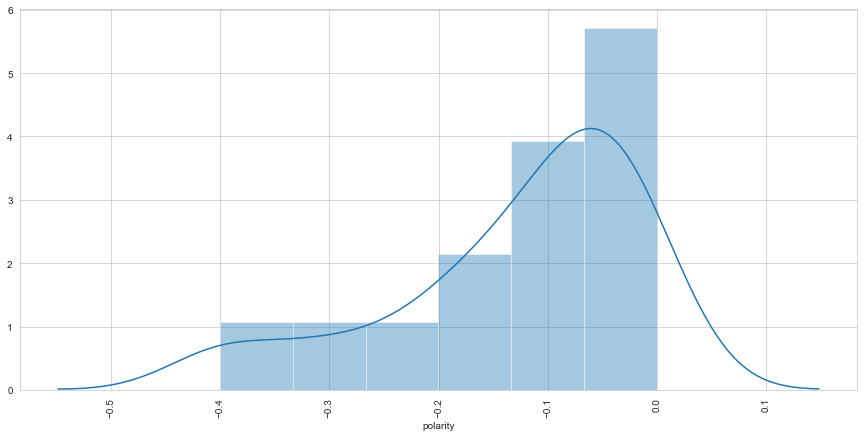

In [88]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['polarity']<0]['polarity'][:50])
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text major ticklabel objects>)

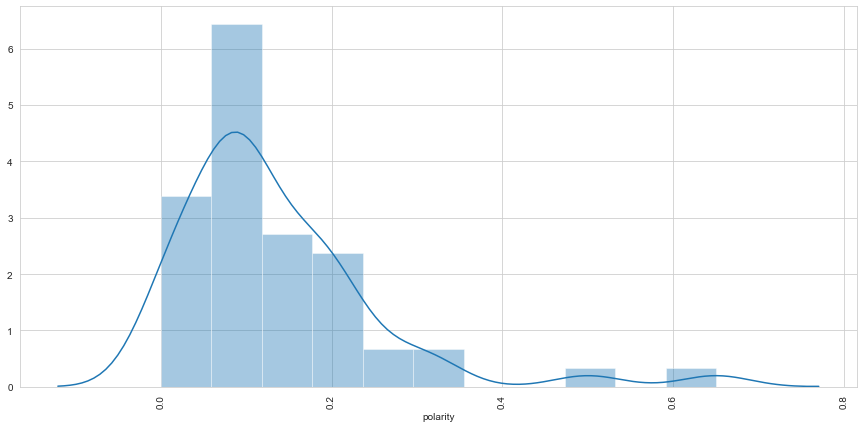

In [89]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['polarity']>0]['polarity'][:50])
plt.xticks(rotation=90)

<Figure size 1080x504 with 0 Axes>

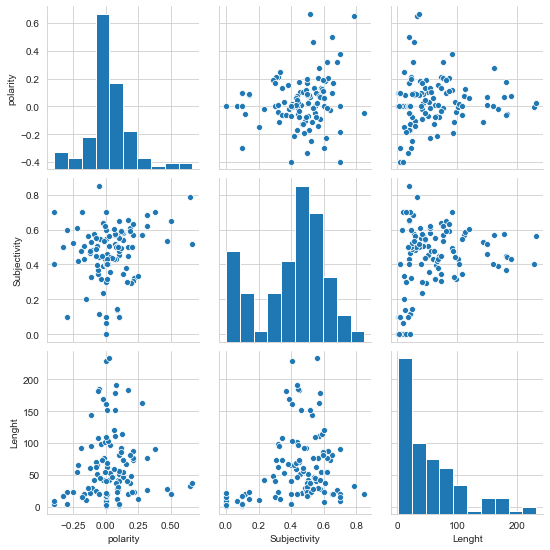

In [90]:
plt.figure(figsize=(15,7))
sns.pairplot(df)

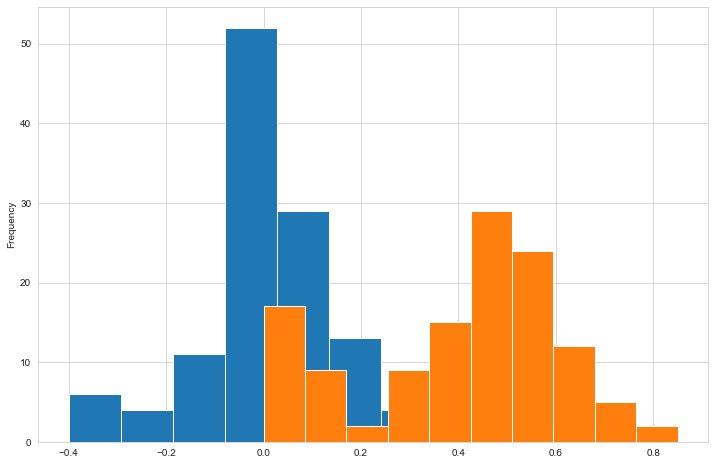

In [91]:
plt.figure(figsize=(12,8))
#df['Lenght'].plot()
df['polarity'].plot(kind= 'hist')
df['Subjectivity'].plot(kind= 'hist')



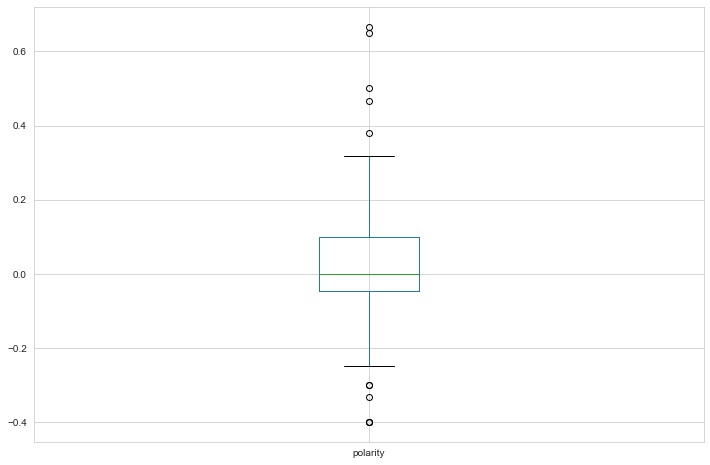

In [92]:
plt.figure(figsize=(12,8))
df['polarity'].plot(kind='box')


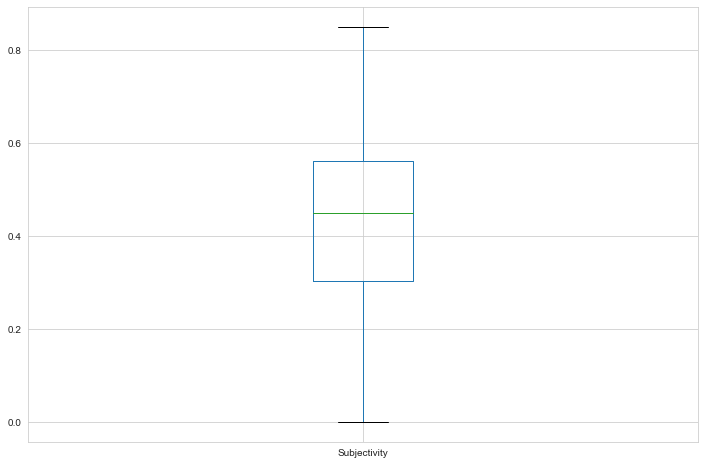

In [93]:
plt.figure(figsize=(12,8))
df['Subjectivity'].plot(kind='box')